# Research seminar project "NPV calculation"

### Импорт необходимых библиотек

In [ ]:
#Библиотека для работы с массивами (векторами данных)
import numpy as np

#Библиотека для работы с датасетами-таблицами
import pandas as pd

#Библиотеки для визуализации, отрисовки графиков
import seaborn as sns
import matplotlib.pyplot as plt

### Считывание и предварительная обработка данных

In [ ]:
#Считываем данные из 6 листа нашего excel-файла, пропуская первые 4 строки, т.к. они не содержат релевантных данных
data=pd.read_excel("Темы исследований.xlsx", sheet_name=6, skiprows=4)

#Убираем нулевой стобец, т.к. он не несет никакой полезной информации
data=data.drop("Unnamed: 0", axis=1)

#Убираем неинформативную первую строку с прочерками
data=data.drop(labels=[1], axis=0)

#Дадим подходящее название столбцу с датами
data=data.rename(columns={"Unnamed: 1":"Date"})

#Выведем наш датасет
data

,Date,Instrument 1,Instrument 2,Instrument 3,Instrument 4,Instrument 5,Instrument 6,Instrument 7,Instrument 8,Instrument 9,...,Instrument 11,Instrument 12,Instrument 13,Instrument 14,Instrument 15,Instrument 16,Instrument 17,Instrument 18,Instrument 19,Instrument 20
0,2021-01-01,-106.000000,-117.660000,-119.780000,-124.020000,-130.380000,-125.08,-137.800000,-127.200000,-128.260000,...,-136.740000,-120.840000,-120.840000,-131.440000,-127.200000,-137.800000,-132.500000,-122.960000,-128.260000,-118.720000
2,2022-01-01,8.500000,10.200000,10.115000,9.605000,9.775000,10.71,10.115000,10.030000,9.435000,...,9.860000,10.625000,9.860000,11.050000,10.030000,11.050000,10.370000,10.625000,10.795000,10.200000
3,2023-01-01,8.840000,10.077600,9.812400,11.492000,9.812400,10.2544,10.077600,10.961600,10.342800,...,11.492000,11.315200,9.989200,9.724000,10.961600,10.077600,10.519600,10.431200,11.315200,10.696400
4,2024-01-01,9.193600,11.032320,10.572640,10.112960,11.583936,11.03232,10.572640,10.112960,11.859744,...,11.032320,10.572640,11.675872,11.767808,11.767808,10.940384,10.572640,10.296832,10.940384,10.940384
5,2025-01-01,9.561344,10.517478,11.091159,10.995546,12.047293,12.23852,11.569226,10.899932,12.429747,...,12.334134,11.760453,11.091159,10.804319,12.334134,12.238520,11.664840,11.951680,11.569226,10.517478
6,2026-01-01,9.943798,11.833119,12.429747,11.833119,11.534805,12.031995,11.236491,11.733681,12.131433,...,11.634243,12.031995,12.628623,11.634243,12.827499,10.938178,10.938178,11.037616,10.938178,11.932557
7,2027-01-01,10.341550,11.375705,13.340599,13.030353,12.513275,13.444015,12.926937,11.996198,12.099613,...,12.306444,12.306444,12.409860,13.133768,11.479120,11.996198,12.926937,11.582536,11.582536,11.789367
8,2028-01-01,10.755212,11.938285,12.583598,13.444015,12.260941,12.476046,13.981775,12.476046,13.981775,...,12.798702,13.981775,13.981775,13.121358,11.830733,13.659119,13.551567,13.551567,13.551567,13.874223
9,2029-01-01,11.185420,14.317338,13.646213,12.975087,13.534358,13.086942,12.415816,13.422504,14.093629,...,13.869921,13.198796,13.981775,13.534358,13.086942,13.198796,14.093629,12.415816,14.541046,14.317338
10,2030-01-01,11.632837,13.145106,12.796121,14.541046,13.610419,13.610419,15.006360,14.308389,15.006360,...,14.424718,14.424718,12.796121,13.494091,12.912449,12.796121,13.610419,14.192061,13.959404,14.308389


Поскольку далее мы будем выполнять математические операции, в которых будет задействована каждая ячейка датасета, нам необходимо проверить, что все значения в ячейках - это числа. Чтобы убедиться в этом, выведем информацию о нашем датасете с помощью метода info(), и посмотрим на самый правый столбец выведенной таблицы - в нем указаны типы данных каждого столбца.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 22
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           22 non-null     datetime64[ns]
 1   Instrument 1   22 non-null     float64       
 2   Instrument 2   22 non-null     float64       
 3   Instrument 3   22 non-null     float64       
 4   Instrument 4   22 non-null     float64       
 5   Instrument 5   22 non-null     float64       
 6   Instrument 6   22 non-null     object        
 7   Instrument 7   22 non-null     float64       
 8   Instrument 8   22 non-null     float64       
 9   Instrument 9   22 non-null     float64       
 10  Instrument 10  22 non-null     float64       
 11  Instrument 11  22 non-null     float64       
 12  Instrument 12  22 non-null     float64       
 13  Instrument 13  22 non-null     float64       
 14  Instrument 14  22 non-null     float64       
 15  Instrument 15  22 non-nul

Видим, что почти во всех столбцах с денежными потоками инструментов тип значений - float64 (число с плавающей точкой), но в столбце "Instrument 6" тип данных - object. Это значит, что в данной колонке присутствуют какие-то нечисловые типы данных. Такие ячейки, скорее всего, были неверно заполнены, и их нужно обработать. Мы их занулим, поскольку не имеем никакой информации о том, какие значения должны были быть на их месте.

In [ ]:
#Применим к выбранному столбцу метод apply, он задействует лямбда-функцию, которая заменит нечисловые значения в столбце на 0
data["Instrument 6"]=data["Instrument 6"].apply(lambda x: x if type(x)==float else 0)

data

,Date,Instrument 1,Instrument 2,Instrument 3,Instrument 4,Instrument 5,Instrument 6,Instrument 7,Instrument 8,Instrument 9,...,Instrument 11,Instrument 12,Instrument 13,Instrument 14,Instrument 15,Instrument 16,Instrument 17,Instrument 18,Instrument 19,Instrument 20
0,2021-01-01,-106.000000,-117.660000,-119.780000,-124.020000,-130.380000,-125.080000,-137.800000,-127.200000,-128.260000,...,-136.740000,-120.840000,-120.840000,-131.440000,-127.200000,-137.800000,-132.500000,-122.960000,-128.260000,-118.720000
2,2022-01-01,8.500000,10.200000,10.115000,9.605000,9.775000,10.710000,10.115000,10.030000,9.435000,...,9.860000,10.625000,9.860000,11.050000,10.030000,11.050000,10.370000,10.625000,10.795000,10.200000
3,2023-01-01,8.840000,10.077600,9.812400,11.492000,9.812400,10.254400,10.077600,10.961600,10.342800,...,11.492000,11.315200,9.989200,9.724000,10.961600,10.077600,10.519600,10.431200,11.315200,10.696400
4,2024-01-01,9.193600,11.032320,10.572640,10.112960,11.583936,11.032320,10.572640,10.112960,11.859744,...,11.032320,10.572640,11.675872,11.767808,11.767808,10.940384,10.572640,10.296832,10.940384,10.940384
5,2025-01-01,9.561344,10.517478,11.091159,10.995546,12.047293,12.238520,11.569226,10.899932,12.429747,...,12.334134,11.760453,11.091159,10.804319,12.334134,12.238520,11.664840,11.951680,11.569226,10.517478
6,2026-01-01,9.943798,11.833119,12.429747,11.833119,11.534805,12.031995,11.236491,11.733681,12.131433,...,11.634243,12.031995,12.628623,11.634243,12.827499,10.938178,10.938178,11.037616,10.938178,11.932557
7,2027-01-01,10.341550,11.375705,13.340599,13.030353,12.513275,13.444015,12.926937,11.996198,12.099613,...,12.306444,12.306444,12.409860,13.133768,11.479120,11.996198,12.926937,11.582536,11.582536,11.789367
8,2028-01-01,10.755212,11.938285,12.583598,13.444015,12.260941,12.476046,13.981775,12.476046,13.981775,...,12.798702,13.981775,13.981775,13.121358,11.830733,13.659119,13.551567,13.551567,13.551567,13.874223
9,2029-01-01,11.185420,14.317338,13.646213,12.975087,13.534358,13.086942,12.415816,13.422504,14.093629,...,13.869921,13.198796,13.981775,13.534358,13.086942,13.198796,14.093629,12.415816,14.541046,14.317338
10,2030-01-01,11.632837,13.145106,12.796121,14.541046,13.610419,13.610419,15.006360,14.308389,15.006360,...,14.424718,14.424718,12.796121,13.494091,12.912449,12.796121,13.610419,14.192061,13.959404,14.308389


### Exploratary Data Analysis

В данном разделе мы хотим выяснить, есть ли в данных выбросы. Для этого изобразим распределение данных на диаграмме типа boxplot, чтобы понять, в каком диапазоне находятся наши денежные потоки, и отследить наличие значительно отличающихся сумм.

Отрисуем два графика: один для выплат агентов (тех сумм, которые они заплатили за покупку рассматриваемых финансовых инструментов), второй для платежей, которые агенты получают впоследствие.

[Предположение состоит в том, что первая группа - отрицательные суммы, а вторая - положительные, поэтому удобнее анализировать их на двух различных графиках, а не на одном.]

Для визуализации мы будем использовать график типа boxplot (также известный как "ящик с усами"). Напомним, как нужно читать такой график:

- верхняя (правая) грань"ящика" показывает верхний квартиль (то значение, ниже которого находятся 75% выборки);
- нижняя (левая) грань"ящика" показывает нижний квартиль (то значение, выше которого находятся 75% выборки);
- черта внутри "ящика" - это медиана, т.е. 50% выборки выше данного значения и 50% выборки - ниже;
- верхняя (правая) засечка показывает максимальное значение, а все, что выше нее - выбросы;
- нижняя (левая) засечка показывает минимальное значение, а все, что ниже нее - выбросы.

Предварительно нам потребуется сделать два массива данных для наших 2 графиков.

In [ ]:
#Создадим массив выплат агентов: возьмем из таблицы только нулевую строку и все столбцы, начиная с первого
payments=np.array(data.iloc[0, 1:])
payments

array([-106.0, -117.66000000000001, -119.77999999999999, -124.02, -130.38,
       -125.08, -137.8, -127.19999999999999, -128.26, -119.77999999999999,
       -136.74, -120.84000000000002, -120.84000000000002, -131.44,
       -127.19999999999999, -137.8, -132.5, -122.96, -128.26,
       -118.72000000000001], dtype=object)

In [ ]:
#Создадим массив из оставшихся строк датасета: возьмем из таблицы все строки с первой и все столбцы с первого
#Полученный двуменый массив "спрямим" в одномерный с помощью метода flatten()
incomes=np.array(data.iloc[1:, 1:]).flatten()
incomes

array([8.50000000e+00, 1.02000000e+01, 1.01150000e+01, 9.60500000e+00,
       9.77500000e+00, 1.07100000e+01, 1.01150000e+01, 1.00300000e+01,
       9.43500000e+00, 1.04550000e+01, 9.86000000e+00, 1.06250000e+01,
       9.86000000e+00, 1.10500000e+01, 1.00300000e+01, 1.10500000e+01,
       1.03700000e+01, 1.06250000e+01, 1.07950000e+01, 1.02000000e+01,
       8.84000000e+00, 1.00776000e+01, 9.81240000e+00, 1.14920000e+01,
       9.81240000e+00, 1.02544000e+01, 1.00776000e+01, 1.09616000e+01,
       1.03428000e+01, 1.11384000e+01, 1.14920000e+01, 1.13152000e+01,
       9.98920000e+00, 9.72400000e+00, 1.09616000e+01, 1.00776000e+01,
       1.05196000e+01, 1.04312000e+01, 1.13152000e+01, 1.06964000e+01,
       9.19360000e+00, 1.10323200e+01, 1.05726400e+01, 1.01129600e+01,
       1.15839360e+01, 1.10323200e+01, 1.05726400e+01, 1.01129600e+01,
       1.18597440e+01, 1.07565120e+01, 1.10323200e+01, 1.05726400e+01,
       1.16758720e+01, 1.17678080e+01, 1.17678080e+01, 1.09403840e+01,
      

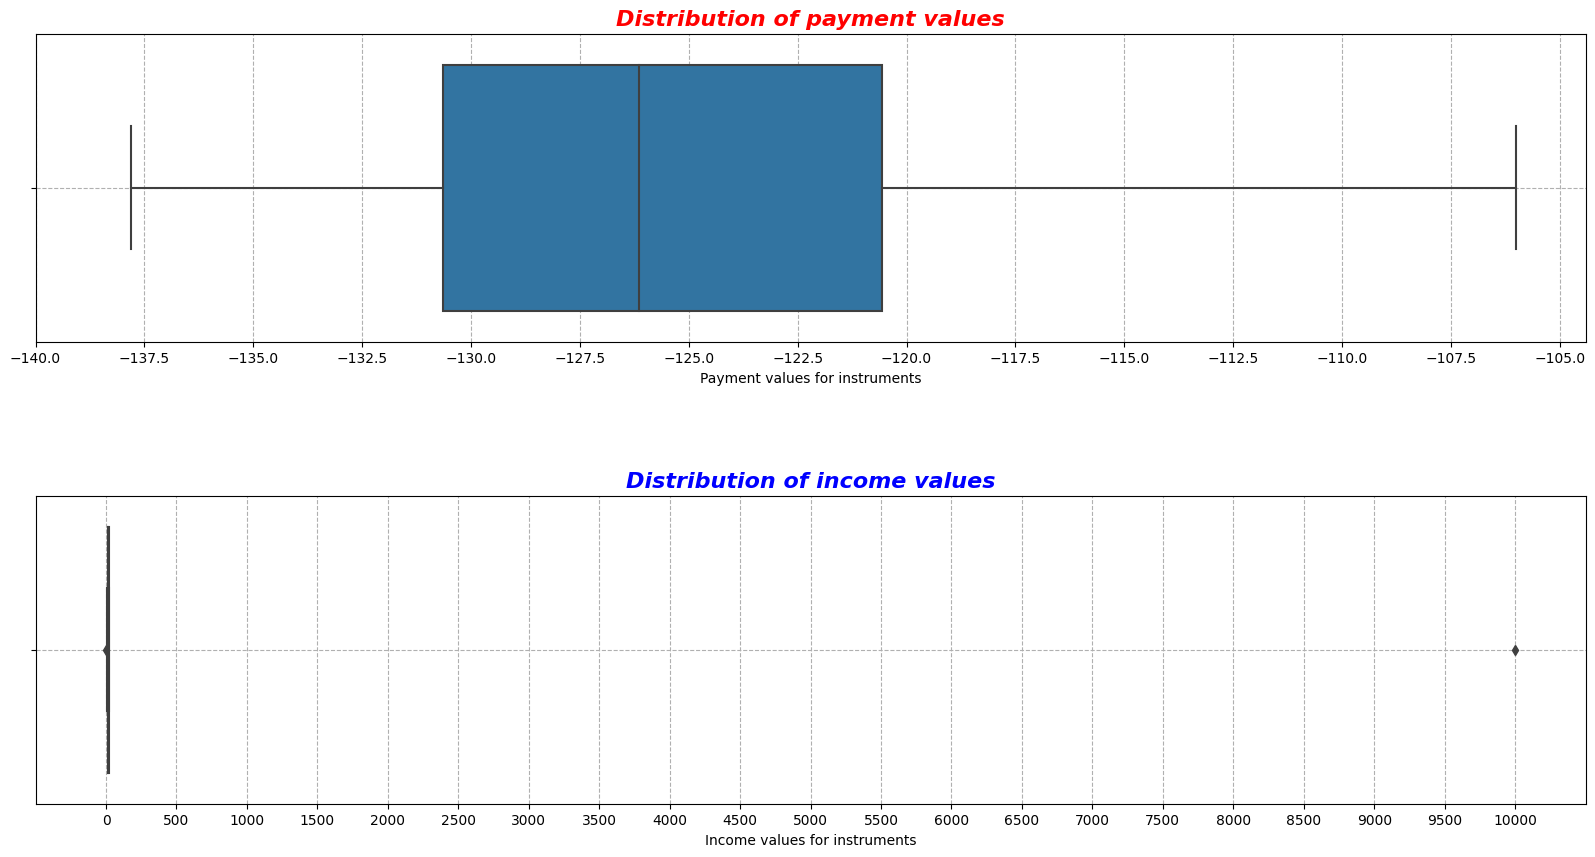

In [ ]:
#Создадим график шириной 20, высотой 10
plt.figure(figsize=(20, 10))

#Настроим расстояние между графиками, чтобы надписи не наслаивались друг на друга
plt.subplots_adjust(hspace = 0.5)

#Создадим первый подграфик
plt.subplot(211)

#Отрисуем "ящик с усами" для выплат агентов
box_pay=sns.boxplot(x=payments)

#Добавим название подграфика
box_pay.set_title("Distribution of payment values", fontdict={'size': 16, 'weight': 'bold', 'color': 'red', 'style':'italic'})

#Подпишем ось Ох
box_pay.set(xlabel="Payment values for instruments")

#Добавим деления на оси
box_pay.set_xticks([-i*2.5 for i in range(56, 41, -1)])
box_pay.set_axisbelow(True)

#Добавим сетку
box_pay.grid(linestyle="dashed")

#Создадим второй подграфик
plt.subplot(212)

#Отрисуем "ящик с усами" для платежей, получаемых агентам
box_inc=sns.boxplot(x=incomes)

#Добавим название подграфика
box_inc.set_title("Distribution of income values", fontdict={'size': 16, 'weight': 'bold', 'color': 'blue', 'style':'italic'})

#Подпишем ось Ох
box_inc.set(xlabel="Income values for instruments")

#Добавим деления на оси
box_inc.set_xticks([i*500 for i in range(0, 21)])
box_inc.set_axisbelow(True)

#Добавим сетку
box_inc.grid(linestyle="dashed")

#Выведем график на экран
plt.show()

Видим, что с платами за инструменты все в порядке: они расположены в небольшом интервале от -140 до -105, а бОльшая часть находится в еще меньшем промежутке.

Однако в денежных потоках, которые агенты получают, есть выдающееся значение. Основная масса выплат сосредоточена около нуля (в том масштабе графика, который мы имеем на данный момент), однако выброс примерно равен 10000.

Найдем номер столбца и номер строки с выдающимся значением в нашем датасете с помощью функции where(): нам опять понадобится не весь датасет, а только строки с первой и столбцы с первого.

In [ ]:
#В переменные-списки rows, cols сохранятся координаты ячеек, в которых значения превышают 9500
#Здесь в качестве меры отсечения мы берем не 10000, а число поменьше, поскольку по графику нельзя точно сказать, выброс равен 10000
#Или 10020, или 9999, но притом четко видно, что он больше 9500
rows, cols = np.where(data.iloc[1:, 1:] > 9500)

#Выведем количество выбросов - оно равно длине любого из полученных списков
print(f"В нашем датасете количество выбросов равно {len(rows)}")

В нашем датасете количество выбросов равно 1


In [ ]:
#Выведем само значение-выброс
#Добавим к координатам 1, поскольку мы получали индексы из обрезанной таблицы, но теперь обращаемся к полной
outline=data.iloc[rows[0]+1, cols[0]+1]

print(f"Выброс равен {outline}") #Ура, мы нашли нужное значение!

Выброс равен 10000.0


Знаем, что один из наиболее широкоприменимых методов обработки выбросов - это замена выброса на медианное значение. Медиана - это, фактически, значение, стоящее в середине некоторого отсортированного списка. Медиана является более репрезентативной характеристикой выборки, чем среднее значение, когда в данных присутствуют выдающиеся значения.

In [ ]:
#Теперь нам необходимо найти медиану в списке incomes, взятом без найденного выброса
#Найдем индекс выброса с помощью функции np.argwhere, удалим выброс из incomes по индексу
#Полученный массив преобразуем к датафрейму и найдем медиану с помощью метода median()
med=pd.DataFrame(np.delete(incomes, np.argwhere(incomes==outline))).median().values[0]
print(f"Медиана равна {med}")

Медиана равна 14.846850177730994


In [ ]:
#Заменим выброс в датасете на медианное значение:
data.iloc[rows[0]+1, cols[0]+1]=med

data

,Date,Instrument 1,Instrument 2,Instrument 3,Instrument 4,Instrument 5,Instrument 6,Instrument 7,Instrument 8,Instrument 9,...,Instrument 11,Instrument 12,Instrument 13,Instrument 14,Instrument 15,Instrument 16,Instrument 17,Instrument 18,Instrument 19,Instrument 20
0,2021-01-01,-106.000000,-117.660000,-119.780000,-124.020000,-130.380000,-125.080000,-137.800000,-127.200000,-128.260000,...,-136.740000,-120.840000,-120.840000,-131.440000,-127.200000,-137.800000,-132.500000,-122.960000,-128.260000,-118.720000
2,2022-01-01,8.500000,10.200000,10.115000,9.605000,9.775000,10.710000,10.115000,10.030000,9.435000,...,9.860000,10.625000,9.860000,11.050000,10.030000,11.050000,10.370000,10.625000,10.795000,10.200000
3,2023-01-01,8.840000,10.077600,9.812400,11.492000,9.812400,10.254400,10.077600,10.961600,10.342800,...,11.492000,11.315200,9.989200,9.724000,10.961600,10.077600,10.519600,10.431200,11.315200,10.696400
4,2024-01-01,9.193600,11.032320,10.572640,10.112960,11.583936,11.032320,10.572640,10.112960,11.859744,...,11.032320,10.572640,11.675872,11.767808,11.767808,10.940384,10.572640,10.296832,10.940384,10.940384
5,2025-01-01,9.561344,10.517478,11.091159,10.995546,12.047293,12.238520,11.569226,10.899932,12.429747,...,12.334134,11.760453,11.091159,10.804319,12.334134,12.238520,11.664840,11.951680,11.569226,10.517478
6,2026-01-01,9.943798,11.833119,12.429747,11.833119,11.534805,12.031995,11.236491,11.733681,12.131433,...,11.634243,12.031995,12.628623,11.634243,12.827499,10.938178,10.938178,11.037616,10.938178,11.932557
7,2027-01-01,10.341550,11.375705,13.340599,13.030353,12.513275,13.444015,12.926937,11.996198,12.099613,...,12.306444,12.306444,12.409860,13.133768,11.479120,11.996198,12.926937,11.582536,11.582536,11.789367
8,2028-01-01,10.755212,11.938285,12.583598,13.444015,12.260941,12.476046,13.981775,12.476046,13.981775,...,12.798702,13.981775,13.981775,13.121358,11.830733,13.659119,13.551567,13.551567,13.551567,13.874223
9,2029-01-01,11.185420,14.317338,13.646213,12.975087,13.534358,13.086942,12.415816,13.422504,14.093629,...,13.869921,13.198796,13.981775,13.534358,13.086942,13.198796,14.093629,12.415816,14.541046,14.317338
10,2030-01-01,11.632837,13.145106,12.796121,14.541046,13.610419,13.610419,15.006360,14.308389,15.006360,...,14.424718,14.424718,12.796121,13.494091,12.912449,12.796121,13.610419,14.192061,13.959404,14.308389


### Расчет  NPV: написание функции

Итак, данные обработаны, и теперь мы можем приступить к непосредственному подсчету NPV для каждого инструмента. Для удобства мы решили оформить его в виде функции, которая принимает на вход ставку дисконтирования и датасет с денежными потоками и возвращает список инструментов, отсортированных по убыванию их NPV.

In [ ]:
#Создадим функцию
def count_NPV(rate, data):
    #Вспомогательный столбец с коэффициентами для каждого года
    coeffs=np.array([rate**i for i in range(0, len(data))])

    #Массивы, из которых впоследствие будет создана результирующая таблица
    names=[]
    profits=[]

    for j in range(1, len(data.iloc[0])):
        #Почленно поделим каждый столбец с денежными потоками на столбец с коэффициентами
        values=np.array(np.array(data[f'Instrument {j}'])/coeffs)

        #Просуммируем приведенные денежные потоки - получаем искомое NPV для данного инструмента
        summ=values.sum()

        #Добавим данный инструмент и его NPV в соответствующие массивы
        names.append(f'Instrument {j}')
        profits.append(summ)

    #Создадим, отсортируем и вернем таблицу-результат
    d={'Instrument name':names, 'Profitability': profits}
    result = pd.DataFrame(data=d, index=[i for i in range(0, len(data.iloc[0])-1)])
    result=result.sort_values(by="Profitability", ascending=False)
    return result

In [ ]:
#Теперь подставим наш коэффициент дисконтирования и датасет в функцию, и получим искомый отсортированный массив
rate=1.05
result=count_NPV(rate, data)
result

,Instrument name,Profitability
9,Instrument 10,67.725991
1,Instrument 2,66.867242
11,Instrument 12,66.082674
12,Instrument 13,66.033605
2,Instrument 3,65.373405
19,Instrument 20,64.238325
3,Instrument 4,60.594797
17,Instrument 18,59.957036
14,Instrument 15,59.344702
8,Instrument 9,59.119366


### Визуализация полученных результатов

Изобразим доходности всех инструментов в убывающем порядке.

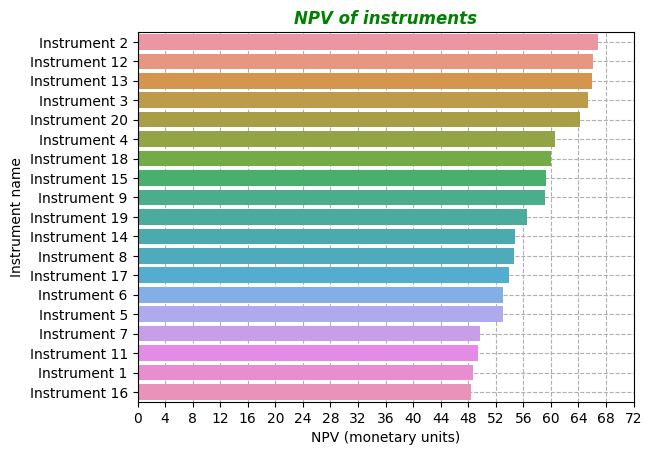

In [ ]:
#Отрисуем горизонтальную столбчатую диаграмму, в которой каждый столбец показывает NPV отдельного инструмента
bar=sns.barplot(data=result.iloc[1:], x="Profitability", y="Instrument name")

#Добавим название графика
bar.set_title("NPV of instruments", fontdict={'size': 12, 'weight': 'bold', 'color': 'green', 'style':'italic'})

#Добавим названия осей
bar.set(xlabel="NPV (monetary units)", ylabel="Instrument name")

#Добавим деления на оси Ох
bar.set_xticks([i*4 for i in range(0, 19)])
bar.set_axisbelow(True)

#Добавим сетку
bar.grid(linestyle="dashed")

#Выведем график
plt.show()